# Problem 1

In [55]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from scipy.stats import norm
plt.rcParams['figure.figsize'] = (10.0, 8.0)
np.random.seed(100)
A = np.array([[0.990, 0.005, 0.005], [0.005, 0.990, 0.005], [0.005, 0.005, 0.990]])
pi0 = np.array([1/3, 1/3, 1/3])
Q = np.array([-1, 0, 1])
T = 1000
scale=0.005
colors = cm.rainbow(np.linspace(0, 1, 6))

In [56]:
def Yt(xt):
    return norm.rvs(loc=xt, scale=scale, size=1)[0]

def run_hmm():
    starting_state = np.random.choice(Q,p=pi0)
    prev_state = starting_state
    xt = [prev_state]
    yt = [Yt(xt)]
    for t in range(1,T):
        next_state = np.random.choice(Q, p=A[xt[t-1]+1,:])
        xt.append(next_state)
        yt.append(Yt(next_state)) 
    return {'xt': xt, 'yt': yt}

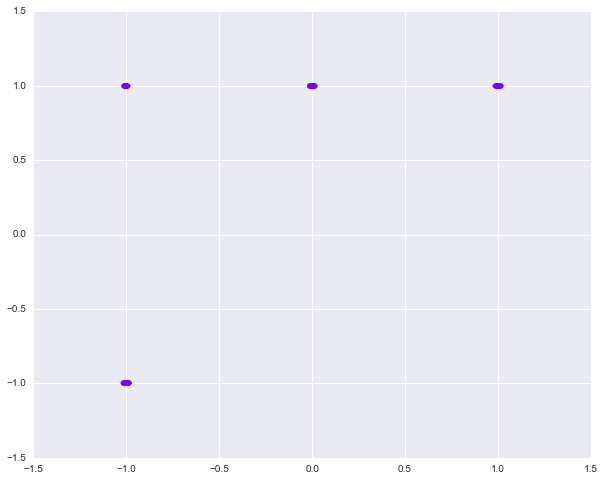

In [67]:
from math import sqrt, pi, exp
def b(s, y):
    #p = norm.pdf(x, loc=m, scale=scale)
    #if p>1:
    #    raise RuntimeError('error',p)
    p = (1/sqrt(2*pi*scale)) * exp(-((y-s)*(y-s)/(2*scale)))
    #print(p)
    return p

def viterbi(yt):
    delta = [{} for t in range(0,T)]
    path = {}
    for q in Q:
        delta[0][q] = pi0[q+1]*f(Q[q+1], yt[0]) 
        path[q] = [q]
    for t in range(1,T):
        tempath = {}
        for q in Q:
            (delta[t][q], state) =  max((delta[t-1][x]*f(Q[x+1], yt[t])*A[x+1,q+1],x) for x in Q)
            tempath[q] = path[state]+[q]
        path = tempath
    #print(delta)
    (p, state) = max((delta[T-1][q], q) for q in Q)
    #print(p)
    return path[state],delta

for i in range(0,1):
    d = run_hmm()
    #ax = fig.add_subplot(3,2,i)
    xt = d['xt']
    yt = d['yt']
    #plt.scatter(xt, yt, color=colors[i])
    xtp, delta = viterbi(yt)
    plt.scatter(yt,xtp, color=colors[i])

# Problem 2

In [53]:
xt

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

## The above problem of course has a grave error. After Dinner.

In [68]:
1.5*1.5

2.25

In [69]:
(2-2.5)*(1-2.5) + (4-2.5)*(2-2.5) + (-2-2.5)*(3-2.5) + (6-2.5)*(4-2.5)

3.0

In [71]:
(2-2.5)**2 + (4-2.5)**2 + (-2-2.5)**2 + (6-2.5)**2

35.0

In [72]:
2.5*0.4

1.0

In [73]:
0.4**2+1.8**2+4.8**2+2.6**2

33.199999999999996

In [74]:
1-33.19/35.0

0.051714285714285824

In [75]:
vif1 = 35/33.19

In [76]:
vif1

1.0545344983428744